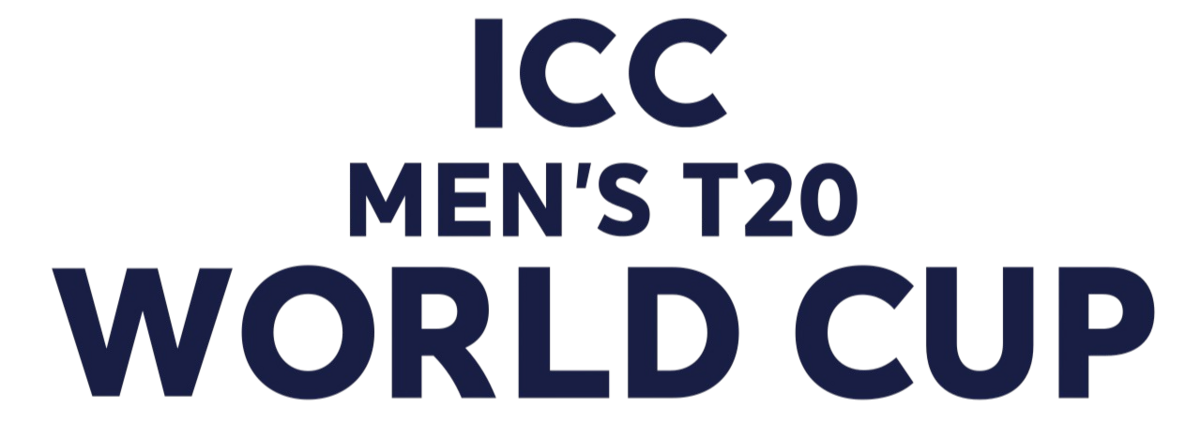

In [25]:
from IPython.display import Image
Image(filename=r'D:\data-analytics-project-for-beginners\T20_World_Cup_Logo_(HD_Version).png')



In [94]:
import pandas as pd
import json
import numpy as np

In [20]:
df_batting=pd.read_csv(r"D:\data-analytics-project-for-beginners\t20_csv_files\fact_bating_summary.csv")
df_batting.head(19)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out,T20I # 1823
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out,T20I # 1823
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out,T20I # 1823
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out,T20I # 1823
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,out,T20I # 1823


In [30]:
df_batting.columns

Index(['match', 'teamInnings', 'battingPos', 'batsmanName', 'runs', 'balls',
       '4s', '6s', 'SR', 'out/not_out', 'match_id'],
      dtype='object')

<h1 align="center">1. Which team scored the highest total </h1>

In [10]:
df_batting.groupby(['teamInnings', 'match_id'])['runs'].sum().idxmax()
df_batting.groupby(['teamInnings', 'match_id'])['runs'].sum().max()


195

In [24]:
# Get the index (team, match_id) with the highest total score
max_score_index = df_batting.groupby(['teamInnings', 'match_id'])['runs'].sum().idxmax()

# Get the actual team name and match ID from the index
team_name, match_id = max_score_index

# Get the maximum score
max_score = df_batting.groupby(['teamInnings', 'match_id'])['runs'].sum().max()

# Display the result
print(f"The team {team_name} scored the highest total of {max_score} runs in match ID {match_id}.")


The team New Zealand scored the highest total of 195 runs in match ID T20I # 1839.


<h1 align="center">2. Highest individual score by a batsman? </h1>

In [50]:
# Find the index of the highest individual score
highest_individual_score_index = df_batting['runs'].idxmax()

# Get the details of the batsman with the highest individual score
highest_score_row = df_batting.loc[highest_individual_score_index]

# Extract the batsman's name and the highest score
highest_score_batsman = highest_score_row['batsmanName']
highest_score = highest_score_row['runs']

# Display the result
print(f"The highest individual score was by {highest_score_batsman} with {highest_score} runs.")


The highest individual score was by Rilee Rossouw with 109 runs.


<h1 align="center">3. Match with the least margin </h1>

In [57]:
# Sum the individual scores for each team in each match
team_scores = df_batting.groupby(['match_id', 'teamInnings'])['runs'].sum().reset_index()

# Pivot the DataFrame to have teams as columns and match_id as rows
pivot_scores = team_scores.pivot(index='match_id', columns='teamInnings', values='runs')

# Calculate the margin of victory
pivot_scores['margin_of_victory'] = pivot_scores.max(axis=1) - pivot_scores.min(axis=1)

# Filter out matches with a margin of victory less than or equal to 0
valid_matches = pivot_scores[pivot_scores['margin_of_victory'] > 0]

# Find the index of the closest match (smallest margin of victory)
closest_match_index = valid_matches['margin_of_victory'].idxmin()

# Get the details of the closest match
closest_match = valid_matches.loc[closest_match_index]

# Retrieve the team names from the original team_scores DataFrame
team1 = closest_match.index[0]
team2 = closest_match.index[1]

# Prepare the output
margin = closest_match['margin_of_victory']
match_id = closest_match.name

# Display the result
print(f"The closest match was {match_id}: {team1} vs {team2} with a margin of {margin} runs.")



The closest match was T20I # 1867: Afghanistan vs Australia with a margin of 1.0 runs.


<h1 align="center"> 4. Team which has the most wins </h1>

In [60]:
# Assuming you have team scores in a pivoted form as in the previous example
team_scores = df_batting.groupby(['match_id', 'teamInnings'])['runs'].sum().reset_index()

# Get the winning team for each match
winning_teams = team_scores.loc[team_scores.groupby('match_id')['runs'].idxmax()]

# Count the number of wins for each team
most_wins_team = winning_teams['teamInnings'].value_counts().idxmax()
most_wins = winning_teams['teamInnings'].value_counts().max()

# Display the result
print(f"The team {most_wins_team} had the most wins: {most_wins}.")


The team Netherlands had the most wins: 4.


<h1 align="center"> 5. Average score of a team per over </h1>

In [80]:
# Calculate total runs for each team
total_runs = df_batting.groupby('teamInnings')['runs'].sum()

# Calculate total balls faced by each team
total_balls = df_batting.groupby('teamInnings')['balls'].sum()

# Convert balls to overs
total_overs = total_balls / 6

# Calculate average score per over
average_score_per_over = total_runs / total_overs

# Display the result
print(average_score_per_over)


teamInnings
Afghanistan     6.668524
Australia       7.850340
Bangladesh      6.800000
England         7.411765
India           7.994483
Ireland         7.353160
Namibia         6.596685
Netherlands     6.050580
New Zealand     8.159204
Pakistan        7.039191
Scotland        7.137363
South Africa    7.893390
Sri Lanka       6.836443
U.A.E.          5.457726
West Indies     6.543909
Zimbabwe        6.424594
dtype: float64


<h1 align="center">6. Which team hit the most number of sixes </h1>

In [84]:
# Count the total number of sixes hit by each team
most_sixes_team = df_batting.groupby('teamInnings')['6s'].sum().idxmax()
most_sixes = df_batting.groupby('teamInnings')['6s'].sum().max()

# Display the result
print(f"The team {most_sixes_team} hit the most sixes: {most_sixes}.")


The team India hit the most sixes: 37.


<h1 align="center"> 7. Which batsman has the highest strike rate </h1>

In [90]:
# Check unique values in the SR column
print(df_batting['SR'].unique())


['50.00' '100.00' '166.66' '108.33' '83.33' '157.14' '0.00' '193.75'
 '90.00' '109.09' '95.23' '126.08' '62.50' '-' '53.33' '60.00' '87.23'
 '107.14' '85.71' '71.42' '142.85' '127.77' '77.77' '89.47' '84.21'
 '93.75' '124.52' '117.64' '114.28' '164.28' '66.66' '145.45' '153.84'
 '107.69' '113.33' '55.55' '44.44' '115.15' '75.00' '115.78' '170.83'
 '25.00' '200.00' '122.72' '120.00' '137.50' '63.63' '105.26' '86.36'
 '89.58' '88.88' '220.00' '125.00' '125.80' '20.00' '123.33' '138.46'
 '72.72' '73.68' '33.33' '90.47' '112.50' '156.36' '133.33' '137.03'
 '130.76' '80.00' '116.66' '87.50' '225.00' '144.44' '142.10' '175.00'
 '22.22' '131.81' '37.50' '179.54' '103.33' '146.15' '160.00' '133.96'
 '140.00' '121.95' '65.62' '148.27' '178.57' '16.66' '82.35' '152.77'
 '104.16' '72.22' '129.16' '118.18' '158.33' '160.86' '128.57' '105.88'
 '14.28' '86.66' '96.15' '42.85' '107.40' '58.33' '173.91' '180.00'
 '262.50' '158.62' '57.14' '41.17' '111.11' '95.00' '138.09' '136.00'
 '90.90' '150.00' '1

In [96]:
# Replace or remove non-numeric values
# For example, replacing empty strings or any specific string with NaN
df_batting['SR'] = df_batting['SR'].replace('', np.nan)  # Replace empty strings with NaN

# Optionally, you can replace specific unwanted values:
# df_batting['SR'] = df_batting['SR'].replace('some_invalid_value', np.nan)

# Convert the SR column to numeric, coercing errors to NaN
df_batting['SR'] = pd.to_numeric(df_batting['SR'], errors='coerce')

# Drop rows where SR is NaN, if you want to exclude them from the analysis
df_batting.dropna(subset=['SR'], inplace=True)


In [104]:
# Ensure 'balls' is a positive integer
df_batting = df_batting[df_batting['balls'] > 0]

# Group by batsman and sum runs and balls faced
batsman_stats = df_batting.groupby('batsmanName')[['runs', 'balls']].sum()

# Filter for batsmen with runs >= 100
batsman_stats = batsman_stats[batsman_stats['runs'] >= 100]

# Calculate strike rate correctly
batsman_stats['SR'] = (batsman_stats['runs'] / batsman_stats['balls']) * 100

# Find the batsman with the highest strike rate
highest_strike_rate_batsman = batsman_stats['SR'].idxmax()
highest_strike_rate = batsman_stats['SR'].max()

# Display the result
print(f"The batsman {highest_strike_rate_batsman} had the highest strike rate: {highest_strike_rate:.2f}.")


The batsman Suryakumar Yadav had the highest strike rate: 189.68.


<h1 align="center"> 8. Highest partnership in a match </h1>

In [108]:
# Example: Assuming we have a 'batsmanName' column and a 'wicket' that identifies the batsman who got out
df_batting['partnership'] = df_batting['batsmanName'].shift(1) + " & " + df_batting['batsmanName']
df_batting

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id,partnership
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823,NaN
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823,Michael van Lingen & Divan la Cock
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823,Divan la Cock & Jan Nicol Loftie-Eaton
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823,Jan Nicol Loftie-Eaton & Stephan Baard
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823,Stephan Baard & Gerhard Erasmus(c)
...,...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,10,9,2,0,111.11,out,T20I # 1879,Alex Hales & Phil Salt
695,Pakistan Vs England,England,4,Ben Stokes,52,49,5,1,106.12,not_out,T20I # 1879,Phil Salt & Ben Stokes
696,Pakistan Vs England,England,5,Harry Brook,20,23,1,0,86.95,out,T20I # 1879,Ben Stokes & Harry Brook
697,Pakistan Vs England,England,6,Moeen Ali,19,13,3,0,146.15,out,T20I # 1879,Harry Brook & Moeen Ali


In [110]:
# Group by match and partnership, then sum runs
partnerships = df_batting.groupby(['match_id', 'partnership'])['runs'].sum()

# Get the highest partnership
highest_partnership_index = partnerships.idxmax()
highest_partnership_score = partnerships.max()

# Display the result
print(f"The highest partnership was {highest_partnership_score} runs in match {highest_partnership_index}.") 


The highest partnership was 109 runs in match ('T20I # 1847', 'Quinton de Kock & Rilee Rossouw').


<h1 align="center"> 9. Highest run chase </h1>

In [122]:
# Create a DataFrame to summarize the total runs scored by each team in matches where they are the winner
# Assuming you have a 'result' column that indicates the winning team
# First, ensure you have a column indicating winning teams

# Replace 'result' with the correct column if it indicates the match winner.
# For example, let's assume you have a column 'out/not_out' to indicate players getting out

# Create a DataFrame for runs scored by each team
runs_scored = df_batting.groupby(['match_id', 'teamInnings'])['runs'].sum().reset_index()

# Assuming we have a way to determine which team won each match, let's say via a 'result' column
# You would need a mechanism to determine which team was chasing or winning in each match
# Example: if 'teamInnings' contains both batting teams

# Here's how we could proceed if 'result' column indicates the winning team:
# If you don't have such a column, we need to look for an alternative way to determine matches

# For demonstration, let's assume 'result' column exists and indicates the winning team
# This is a placeholder to represent what you might have
# wins = runs_scored[runs_scored['teamInnings'] == 'Winning Team']  # Adjust this part accordingly

# Find the maximum runs scored by a winning team
max_chased_runs = runs_scored.groupby('teamInnings')['runs'].max()

# Find the team with the highest runs scored in the matches
highest_chase_team = max_chased_runs.idxmax()
highest_chase_value = max_chased_runs.max()

# Display the result
print(f"The team {highest_chase_team} successfully chased the highest score of {highest_chase_value}.")


The team New Zealand successfully chased the highest score of 195.


<h1 align="center"> 10. Which player holds the fastest fifty record </h1>

In [124]:
# Filter for batsmen who scored 50 or more runs
fifty_data = df_batting[df_batting['runs'] >= 50]

# Group by batsman and find the minimum balls faced to score at least 50
balls_faced_min = fifty_data.groupby('batsmanName')['balls'].min()

# Find the batsman who achieved this with the fewest balls faced
batsman_with_least_balls = balls_faced_min.idxmin()
least_balls_faced = balls_faced_min.min()

# Display the result
print(f"The batsman {batsman_with_least_balls} scored a fifty with the least balls faced: {least_balls_faced}.")


The batsman Marcus Stoinis scored a fifty with the least balls faced: 18.


<h1 align="center"> 11. Most consistent team </h1>

In [126]:
# Calculate total runs by team in each match
team_runs = df_batting.groupby(['teamInnings', 'match_id'])['runs'].sum()

# Calculate average and standard deviation of runs for each team
team_average = team_runs.groupby('teamInnings').mean()
team_std = team_runs.groupby('teamInnings').std()

# Find the team with the least variation (coefficient of variation)
least_variation_team = (team_std / team_average).idxmin()

# Display the result
print(f"The team with the least variation in performance is: {least_variation_team}.")


The team with the least variation in performance is: Ireland.


<h1 align="center"> 12. Which player faced most number of balls </h1>

In [130]:
# Filter for batsmen who were not out
unbeaten_data = df_batting[df_batting['out/not_out'] == 'not_out']

# Group by batsman and match_id, then sum the balls faced
balls_faced_sum = unbeaten_data.groupby(['batsmanName', 'match_id'])['balls'].sum()

# Find the batsman who faced the most balls and was unbeaten
batsman_most_balls = balls_faced_sum.idxmax()
most_balls_faced = balls_faced_sum.max()

# Display the result
print(f"The batsman {batsman_most_balls[0]} faced the most balls while unbeaten in match {batsman_most_balls[1]}: {most_balls_faced}.")


The batsman Devon Conway faced the most balls while unbeaten in match T20I # 1839: 58.


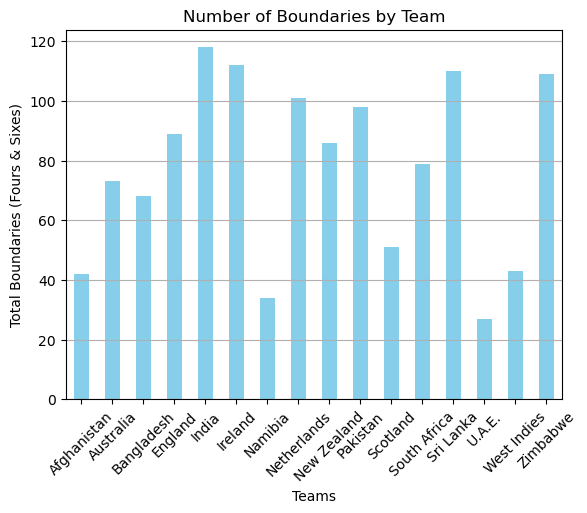

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_batting is your DataFrame

# Group by 'teamInnings' and sum the number of fours and sixes
boundary_data = df_batting.groupby('teamInnings')[['4s', '6s']].sum().sum(axis=1)

# Plotting the total number of boundaries
boundary_data.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Boundaries by Team')
plt.xlabel('Teams')
plt.ylabel('Total Boundaries (Fours & Sixes)')
plt.xticks(rotation=45)  # Rotate team names for better readability
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot


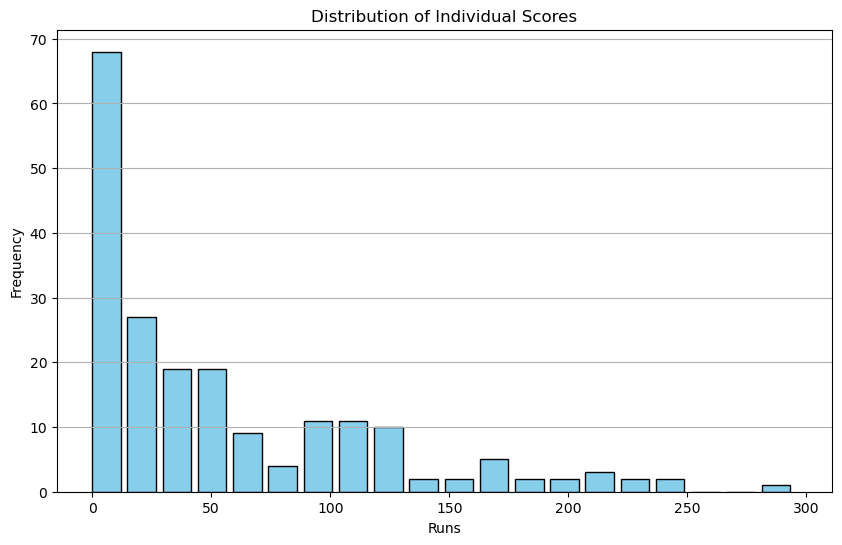

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_batting is your DataFrame

# Group by 'batsmanName' and sum the runs scored by each batsman
batsman_scores = df_batting.groupby('batsmanName')['runs'].sum()

# Plotting the distribution of individual scores as a histogram
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
batsman_scores.plot(kind='hist', bins=20, color='skyblue',width=12, edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Individual Scores')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Optional: add grid lines for better readability
plt.show()  # Display the plot


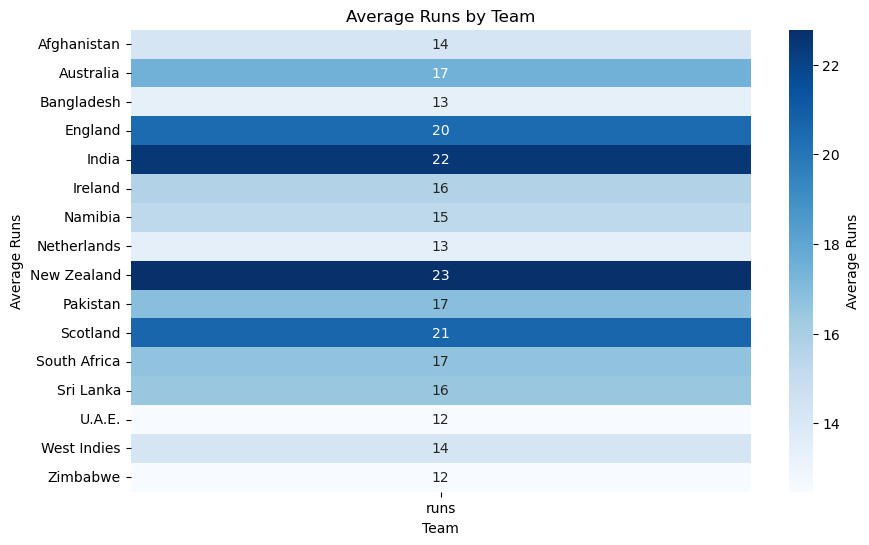

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_batting is your DataFrame

# Group by 'teamInnings' and calculate the average runs
run_rate = df_batting.groupby('teamInnings')['runs'].mean().reset_index()

# Creating a DataFrame suitable for heatmap (with team names as index)
run_rate_matrix = run_rate.set_index('teamInnings')

# Plotting the heatmap
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
sns.heatmap(run_rate_matrix, annot=True, cmap='Blues', cbar_kws={'label': 'Average Runs'})

# Adding titles and labels
plt.title('Average Runs by Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.show()  # Display the plot


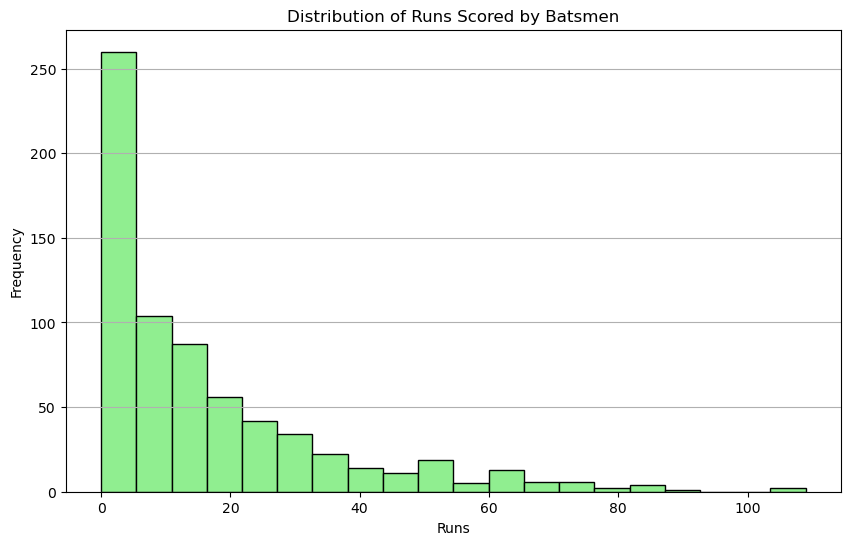

In [159]:
plt.figure(figsize=(10, 6))
df_batting['runs'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


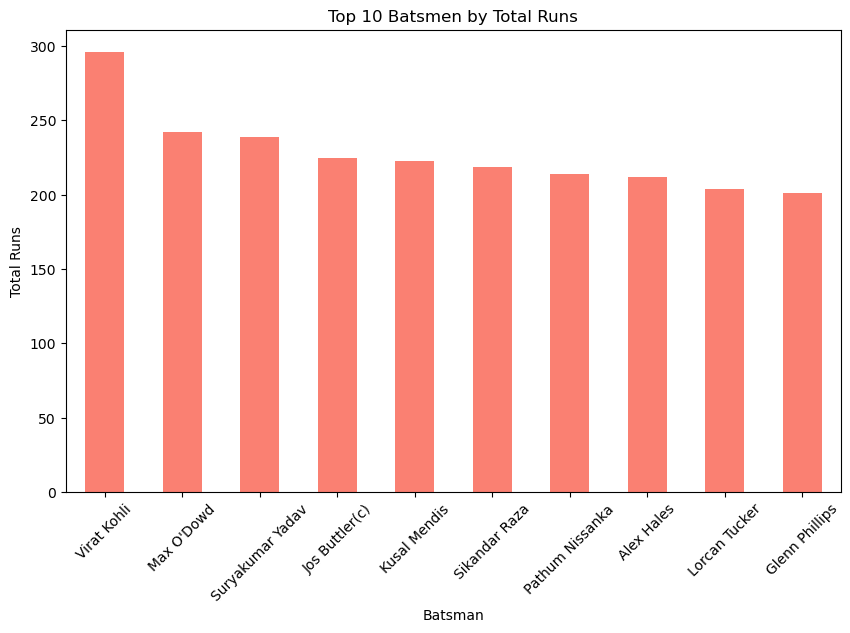

In [161]:
top_batsman = df_batting.groupby('batsmanName')['runs'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_batsman.plot(kind='bar', color='salmon')
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()


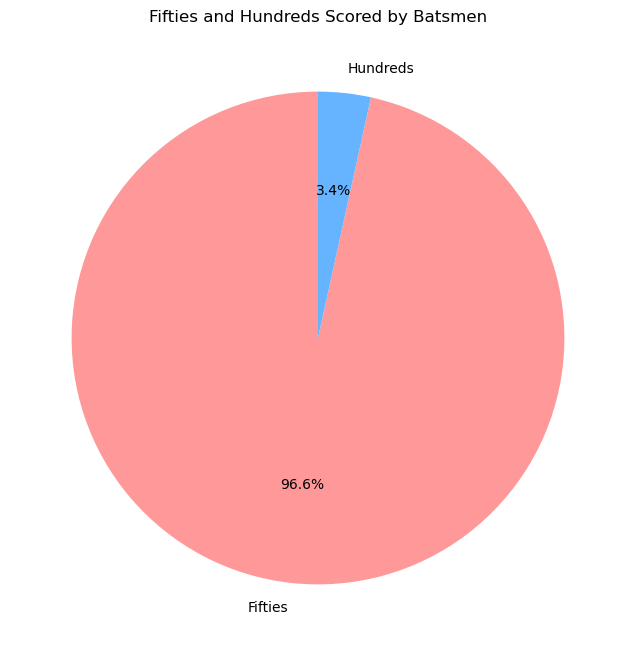

In [163]:
fifty_count = (df_batting['runs'] >= 50) & (df_batting['runs'] < 100)
hundred_count = df_batting['runs'] >= 100
counts = [fifty_count.sum(), hundred_count.sum()]
labels = ['Fifties', 'Hundreds']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Fifties and Hundreds Scored by Batsmen')
plt.show()


C:\Users\zubai\AppData\Local\Temp\ipykernel_20436\913280662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='battingPos', y='runs', data=df_batting, palette='Set3')


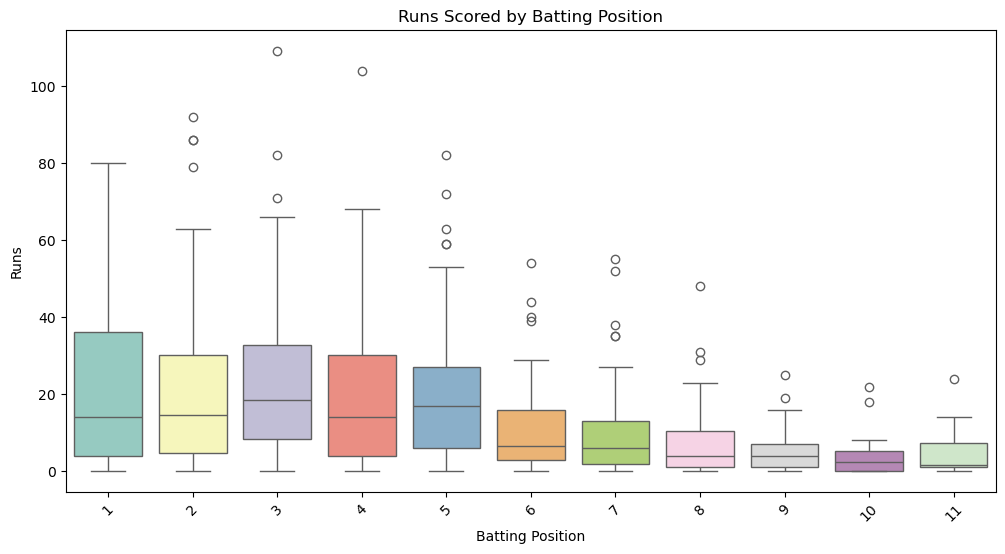

In [165]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='battingPos', y='runs', data=df_batting, palette='Set3')
plt.title('Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()


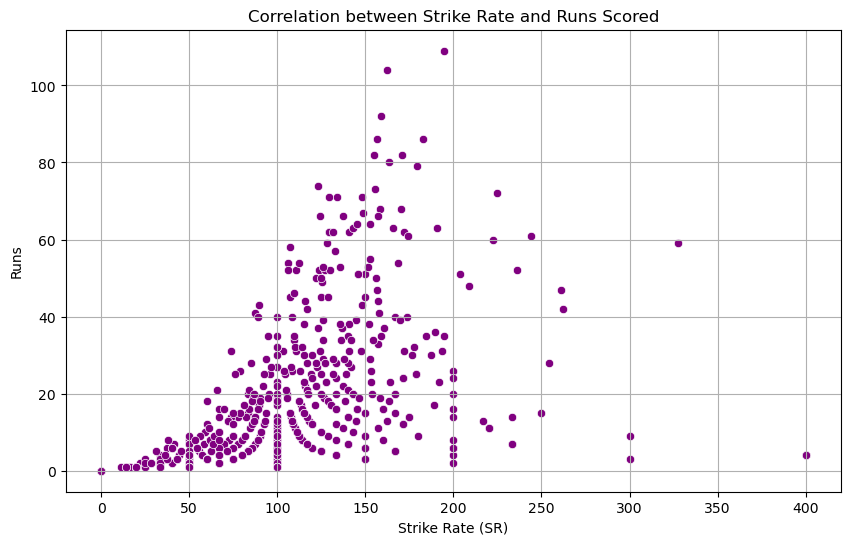

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SR', y='runs', data=df_batting, color='purple')
plt.title('Correlation between Strike Rate and Runs Scored')
plt.xlabel('Strike Rate (SR)')
plt.ylabel('Runs')
plt.grid()
plt.show()


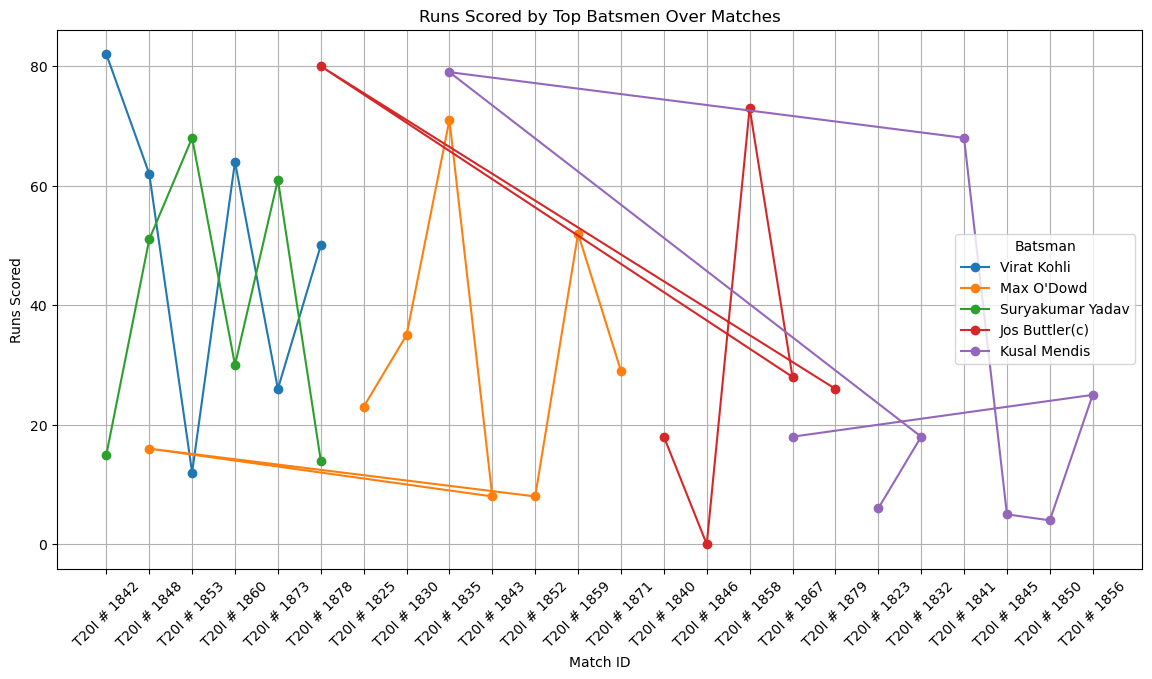

In [171]:
# Choose the top 5 batsmen based on total runs
top_batsmen = df_batting.groupby('batsmanName')['runs'].sum().nlargest(5).index
top_batsman_data = df_batting[df_batting['batsmanName'].isin(top_batsmen)]

plt.figure(figsize=(14, 7))
for batsman in top_batsmen:
    batsman_matches = top_batsman_data[top_batsman_data['batsmanName'] == batsman]
    runs_per_match = batsman_matches.groupby('match_id')['runs'].sum()
    plt.plot(runs_per_match.index, runs_per_match, marker='o', label=batsman)

plt.title('Runs Scored by Top Batsmen Over Matches')
plt.xlabel('Match ID')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.legend(title='Batsman')
plt.grid()
plt.show()


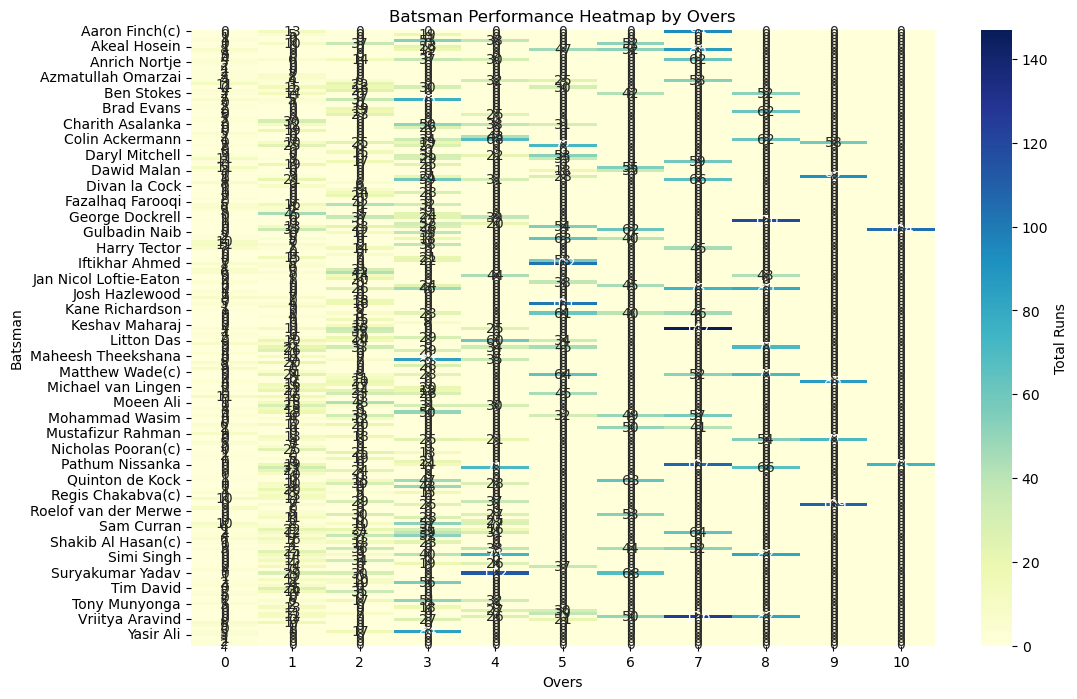

In [173]:
# Assuming each match has a corresponding over number for each run
df_batting['over'] = df_batting['balls'] // 6  # Convert balls to overs if not already available

# Create a pivot table to summarize runs scored by batsman and over
heatmap_data = df_batting.pivot_table(values='runs', index='batsmanName', columns='over', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Total Runs'})
plt.title('Batsman Performance Heatmap by Overs')
plt.xlabel('Overs')
plt.ylabel('Batsman')
plt.show()


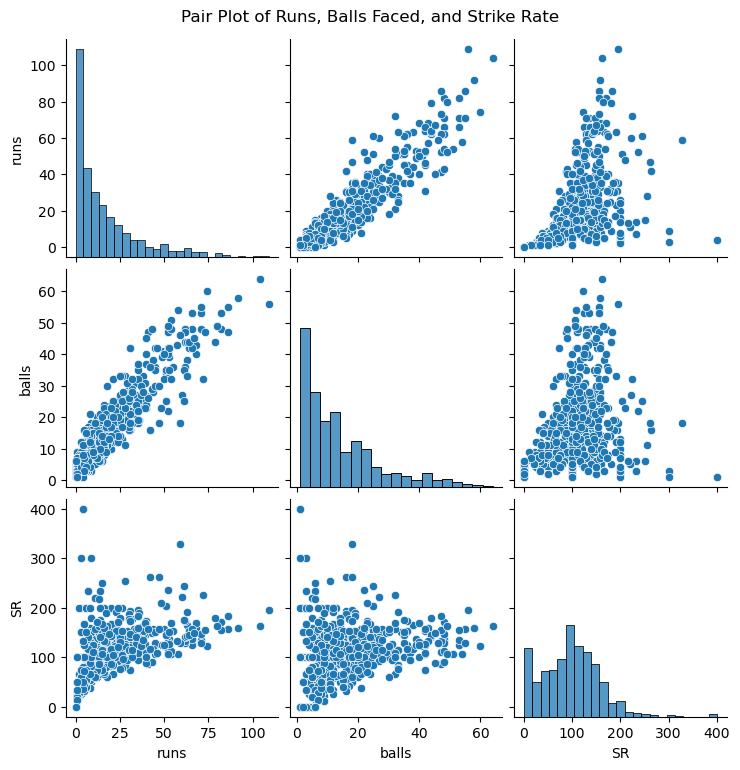

In [175]:
# Create a new DataFrame with necessary columns
batting_stats = df_batting[['runs', 'balls', 'SR']]

# Plotting pair plot
sns.pairplot(batting_stats)
plt.suptitle('Pair Plot of Runs, Balls Faced, and Strike Rate', y=1.02)
plt.show()


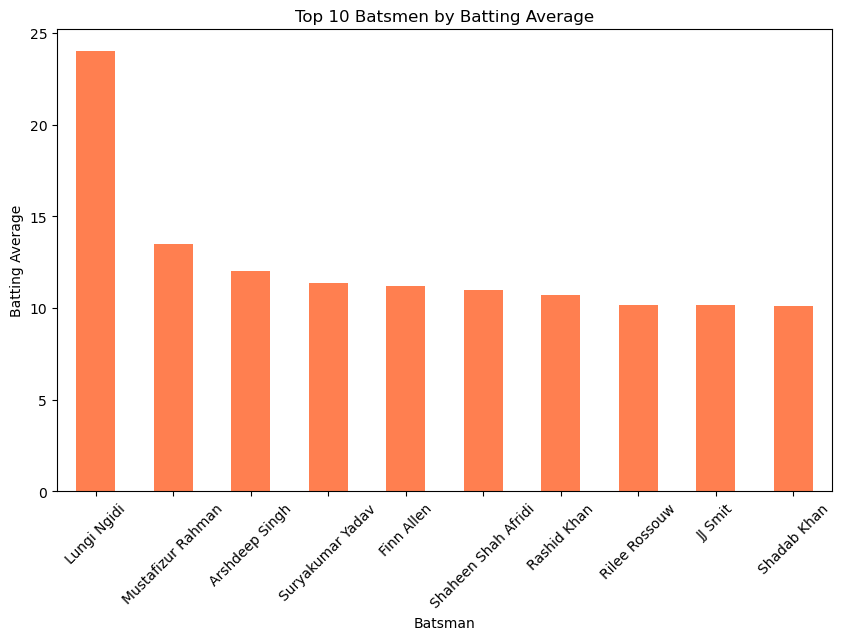

In [179]:
batting_average = df_batting.groupby('batsmanName').agg({'runs': 'sum', 'balls': 'sum'})
batting_average['average'] = batting_average['runs'] / (batting_average['balls'] / 6)  # Assuming balls faced are in balls

# Get the top 10 by batting average
top_averages = batting_average.nlargest(10, 'average')['average']

plt.figure(figsize=(10, 6))
top_averages.plot(kind='bar', color='coral')
plt.title('Top 10 Batsmen by Batting Average')
plt.xlabel('Batsman')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df_batting[['balls', 'SR', '4s', '6s', 'battingPos']]  # Features
y = df_batting['runs']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 5.94
